In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

# Meepo pre injury we can decode forelimb quite well

In [2]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/meepo_10-10_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/3-results-injured-meepolemons1004_meepo_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)

0.3470000000000001


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
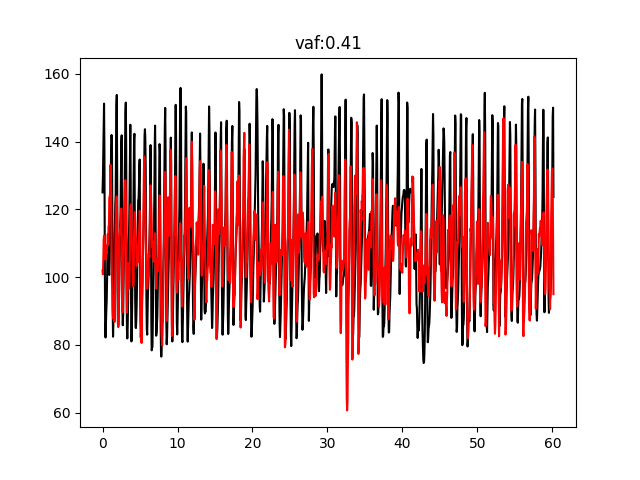

In [4]:
cp1_h, cp1_vaf, cp1_testx, cp1_testy = cp1.decode_angles(metric_angle='forelimb')
plot_wiener_filter_predic(cp1_testx, cp1_testy[:,6], cp1_h[:,6])


print(cp1_vaf[6])

## same with phase, although not sure our statistical metric is the best

0.37061137421276125


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
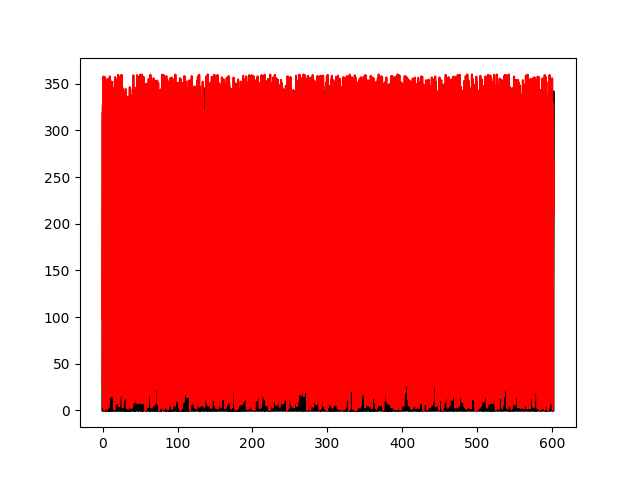

In [5]:
cp1_predic_phases, cp1_actual_phases, cp1_sin, cp1_cos, cp1_phase_vaf = cp1.decode_phase(metric_angle='forelimb')
cp1_lowpass_predic_phases = butter_lowpass_filter(cp1_predic_phases, 3, 20)
fig0, ax0 = plt.subplots()
ts = bins_to_seconds(cp1_actual_phases.shape[0])
ax0.plot(ts, cp1_actual_phases[:,6], color='black')
ax0.plot(ts, cp1_predic_phases[:,6], color='red')

print(np.average((cp1_phase_vaf[0][6], cp1_phase_vaf[1][6])))

In [6]:
cp1_h_sin = cp1.h_sin
cp1_h_cos = cp1.h_cos

# post-injury

## we first need to process data, removing bad gaits and stitching together good ones

In [7]:
cc1 = CCAProcessor(cp1, cp2, metric_angle='forelimb', align=0)

should be good to align
(2110, 32)
(2110, 7)
(2110, 32)
(2110, 7)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
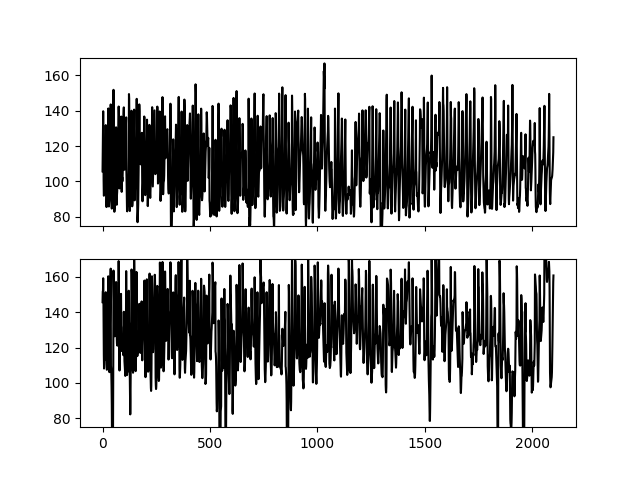

In [8]:
cp1_procx = cc1.data['cp1']['proc_x']
cp1_procy = cc1.data['cp1']['proc_y']

cp2_procx = cc1.data['cp2']['proc_x']
cp2_procy = cc1.data['cp2']['proc_y']

cp1_procx_format, cp1_procy_format = format_data(cp1_procx, cp1_procy)
cp2_procx_format, cp2_procy_format = format_data(cp2_procx, cp2_procy)

fig1, ax1 = plt.subplots(2, sharex=True)
ax1[0].set_ylim(75,170)
ax1[1].set_ylim(75,170)
ax1[0].plot(cp1_procy_format[:,6], color='black')
ax1[1].plot(cp2_procy_format[:,6], color='black')

## how well can we decode from scratch

-0.154


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
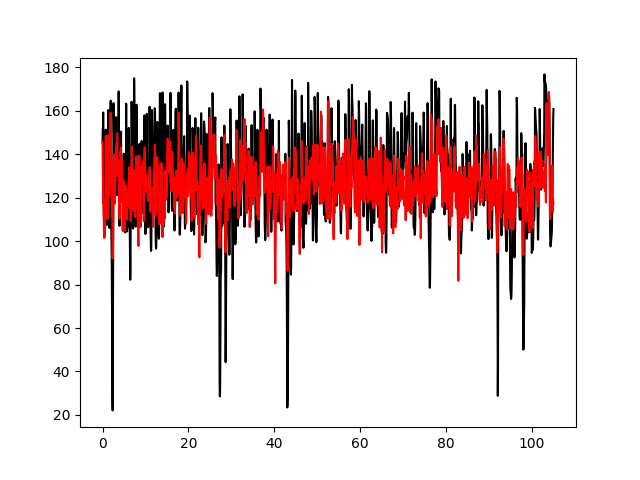

In [24]:
cp2_h, cp2_vaf, cp2_testx, cp2_testy = cp2.decode_angles(X=[cp2_procx], Y=[cp2_procy], metric_angle='forelimb')
cp2_linear_predics = test_wiener_filter(cp2_procx_format, cp2_h)
ts = bins_to_seconds(cp2_procy_format.shape[0])
fig2, ax2 = plt.subplots()
ax2.plot(ts, cp2_procy_format[:,6], color='black')
ax2.plot(ts, cp2_linear_predics[:,6], color='red')

#plot_wiener_filter_predic(cp2_testx, cp2_testy[:,6], cp2_h[:,6])

print(cp2_vaf[6])

-0.12218213709924107


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
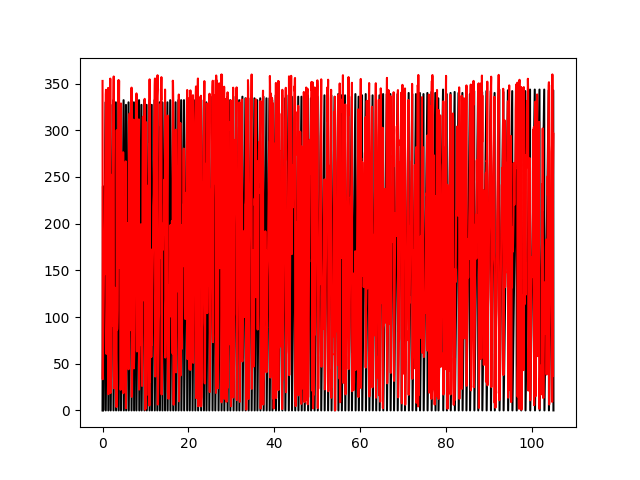

In [21]:
cp2_linear_predic_phases, cp2_actual_phases, cp2_sin, cp2_cos, cp2_phase_tests = cp2.decode_phase(rates=[cp2_procx], angles=[cp2_procy], metric_angle='forelimb')
fig2, ax2 = plt.subplots()
ts = bins_to_seconds(cp2_actual_phases.shape[0])
ax2.plot(ts, cp2_actual_phases[:,6], color='black')
ax2.plot(ts, cp2_linear_predic_phases[:,6], color='red')

print(np.average((cp2_linear_phase_vafs[0][6], cp2_linear_phase_vafs[1][6])))

# does aligning to pre-injury data give better predictions?

In [25]:
cp2_ridge_transformer, cp2_ridge_h, cp2_ridge_vaf, predic, actual = cc1.new_apply_ridge(metric_angle='forelimb', decoder=cp1_h, my_alpha=100)

initial_scoring is : -0.16
new_scoring is: 0.33
test_set_score=-0.19
initial_scoring is : -0.15
new_scoring is: 0.33
test_set_score=0.04
initial_scoring is : -0.18
new_scoring is: 0.31
test_set_score=-0.22
initial_scoring is : -0.15
new_scoring is: 0.32
test_set_score=-0.13
initial_scoring is : -0.14
new_scoring is: 0.31
test_set_score=-0.02
initial_scoring is : -0.14
new_scoring is: 0.32
test_set_score=-0.22
initial_scoring is : -0.13
new_scoring is: 0.31
test_set_score=-0.17
initial_scoring is : -0.16
new_scoring is: 0.3
test_set_score=-0.03
initial_scoring is : -0.16
new_scoring is: 0.31
test_set_score=-0.03
initial_scoring is : -0.15
new_scoring is: 0.34
test_set_score=-0.18


In [26]:
print(np.average(cp2_ridge_vaf))

-0.11499999999999999


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
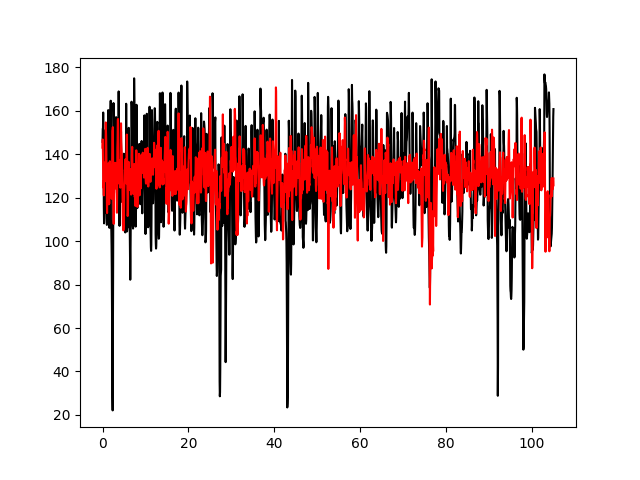

In [28]:
cp2_procx_transform = cc1.quick_cca(cp2_procx, cp2_ridge_transformer, scale=False)
cp2_procx_transform_format, _ = format_data(cp2_procx_transform, cp2_procy)

cp2_ridge_predics = test_wiener_filter(cp2_procx_transform_format, cp2_ridge_h)
fig3, ax3 = plt.subplots()
ts = bins_to_seconds(cp2_procy_format.shape[0])
ax3.plot(ts, cp2_procy_format[:,6], color='black')
ax3.plot(ts, cp2_ridge_predics[:,6]+30, color='red')
#ax3.plot(ts, cp2_linear_predics[:,6], color='green')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
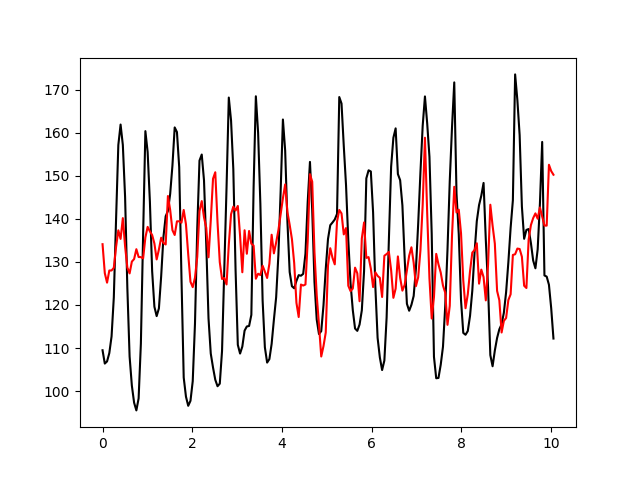

In [33]:
fig33, ax33 = plt.subplots()
ts = bins_to_seconds(actual.shape[0])
ax33.plot(ts, actual[:,6], color='black')
ax33.plot(ts, predic[:,6]+30, color='red')

# does pinv work?

In [42]:
clf, pinv_vaf, pinv_predic, actual_predic = cc1.new_apply_pinv_transform(decoder=cp1_h)

test_set_score=-0.05
test_set_score=-0.18
test_set_score=-0.08
test_set_score=-0.66
test_set_score=0.16
test_set_score=-0.02
test_set_score=-0.14
test_set_score=-0.56
test_set_score=-0.08
test_set_score=-0.03


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
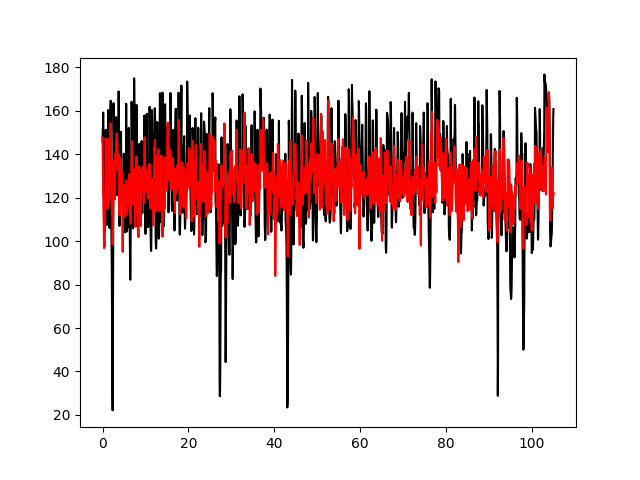

In [50]:
cp2_pinv_predics = pinv_predicter(clf, cp1_h, cp2_procx_format)
fig4, ax4 = plt.subplots()
ts = bins_to_seconds(cp2_procy_format.shape[0])
ax4.plot(ts, cp2_procy_format[:,6], color='black')
ax4.plot(ts, cp2_pinv_predics[:,6], color='red')
#ax4.plot(ts, cp2_linear_predics[:,6], color='green')

# does ridge help decode phase


In [66]:
_, _, cp1_proc_sin, cp1_proc_cos, _ =  cp1.decode_phase(rates=cp1_procx, angles=cp1_procy, metric_angle='forelimb')
_, cp2_actual_phase, cp2_proc_sin, cp2_proc_cos, _ =  cp2.decode_phase(rates=cp2_procx, angles=cp2_procy, metric_angle='forelimb')

In [67]:
sin_transformer, sin_h, cc1_sin_vaf, _, _ = cc1.new_apply_ridge(x1 = cp1_procx, y1 = cp1_proc_sin, x2=cp2_procx, y2=cp2_proc_sin, metric_angle='forelimb', decoder=cp1_h_sin) 
cos_transformer, cos_h, cc1_cos_vaf, _, _ = cc1.new_apply_ridge(x1 = cp1_procx, y1 = cp1_proc_cos, x2=cp2_procx, y2=cp2_proc_cos, metric_angle='forelimb', decoder=cp1_h_cos) 

initial_scoring is : -0.52
new_scoring is: 0.51
test_set_score=-0.16
initial_scoring is : -0.55
new_scoring is: 0.51
test_set_score=0.03
initial_scoring is : -0.54
new_scoring is: 0.5
test_set_score=-0.84
initial_scoring is : -0.53
new_scoring is: 0.48
test_set_score=-0.16
initial_scoring is : -0.51
new_scoring is: 0.49
test_set_score=-0.13
initial_scoring is : -0.52
new_scoring is: 0.48
test_set_score=-0.31
initial_scoring is : -0.5
new_scoring is: 0.47
test_set_score=-0.12
initial_scoring is : -0.57
new_scoring is: 0.47
test_set_score=-0.38
initial_scoring is : -0.56
new_scoring is: 0.51
test_set_score=-0.33
initial_scoring is : -0.54
new_scoring is: 0.52
test_set_score=-0.21
initial_scoring is : -0.57
new_scoring is: 0.47
test_set_score=-0.18
initial_scoring is : -0.59
new_scoring is: 0.51
test_set_score=-0.06
initial_scoring is : -0.59
new_scoring is: 0.48
test_set_score=-0.56
initial_scoring is : -0.58
new_scoring is: 0.47
test_set_score=-0.3
initial_scoring is : -0.56
new_scoring

In [68]:
print((np.average(cc1_cos_vaf) + np.average(cc1_sin_vaf))/2)

-0.2615


In [70]:
x_sin = cc1.quick_cca(cp2_procx, sin_transformer, scale=False)
x_cos = cc1.quick_cca(cp2_procx, cos_transformer, scale=False)

x_sin_format, _ = format_data(x_sin, cp2_procy)
x_cos_format, _ = format_data(x_cos, cp2_procy)

predic_sin = test_wiener_filter(x_sin_format, sin_h)
predic_cos = test_wiener_filter(x_cos_format, cos_h)

predic_phase = arctan_fn(predic_sin, predic_cos)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
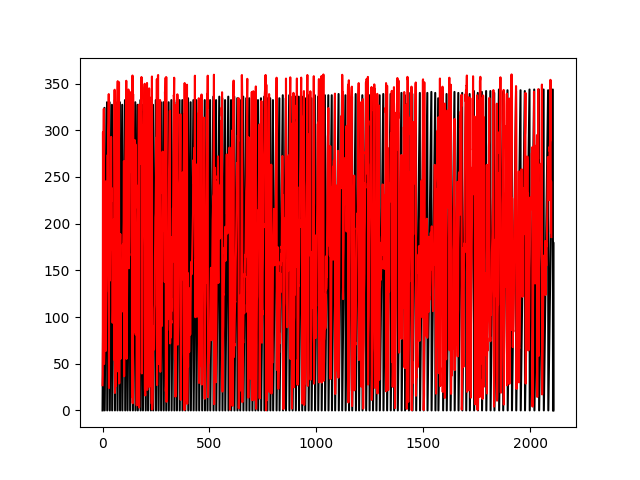

In [72]:
fig5, ax5 = plt.subplots()
ax5.plot(cp2_actual_phase[:,6], color='black')
ax5.plot(predic_phase[:,6], color='red')

In [87]:
cc2 = CCAProcessor(cp2, cp3, metric_angle='forelimb')

should be good to align
(1676, 32)
(1676, 7)
(1676, 32)
(1676, 7)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
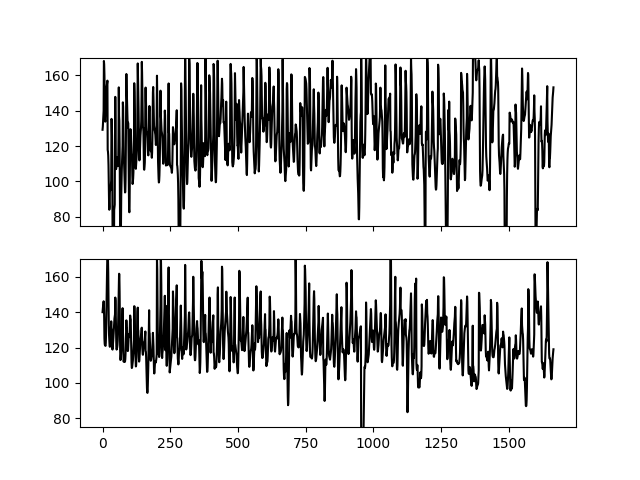

In [88]:
cp2_procx2 = cc2.data['cp1']['proc_x']
cp2_procy2 = cc2.data['cp1']['proc_y']

cp3_procx = cc2.data['cp2']['proc_x']
cp3_procy = cc2.data['cp2']['proc_y']

cp2_procx2_format, cp2_procy2_format = format_data(cp2_procx2, cp2_procy2)
cp3_procx_format, cp3_procy_format = format_data(cp3_procx, cp3_procy)

fig6, ax6 = plt.subplots(2, sharex=True)
ax6[0].set_ylim(75,170)
ax6[1].set_ylim(75,170)
ax6[0].plot(cp2_procy2_format[:,6], color='black')
ax6[1].plot(cp3_procy_format[:,6], color='black')

-0.41400000000000003


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
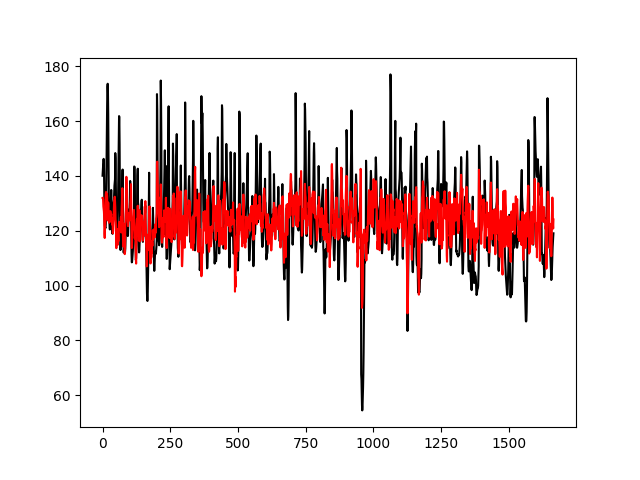

In [89]:
cp3_h, cp3_vaf, _, _, = cp3.decode_angles(X=[cp3_procx], Y=[cp3_procy], metric_angle='forelimb')
cp3_linear_predics = test_wiener_filter(cp3_procx_format, cp3_h)
fig7, ax7 = plt.subplots()
ax7.plot(cp3_procy_format[:,6], color='black')
ax7.plot(cp3_linear_predics[:,6], color='red')

print(cp3_vaf[6])

In [90]:
cp3_ridge_transformer, cp3_ridge_h, cp3_ridge_vaf, predic, actual = cc2.new_apply_ridge(metric_angle='forelimb', decoder=cp2_h, my_alpha=100)

initial_scoring is : -0.14
new_scoring is: 0.31
test_set_score=-0.51
initial_scoring is : -0.13
new_scoring is: 0.3
test_set_score=-0.45
initial_scoring is : -0.15
new_scoring is: 0.29
test_set_score=-0.01
initial_scoring is : -0.14
new_scoring is: 0.31
test_set_score=-0.42
initial_scoring is : -0.15
new_scoring is: 0.31
test_set_score=-0.13
initial_scoring is : -0.11
new_scoring is: 0.25
test_set_score=-0.51
initial_scoring is : -0.15
new_scoring is: 0.3
test_set_score=-0.43
initial_scoring is : -0.2
new_scoring is: 0.32
test_set_score=-0.82
initial_scoring is : -0.14
new_scoring is: 0.3
test_set_score=-0.34
initial_scoring is : -0.16
new_scoring is: 0.34
test_set_score=-0.08


In [97]:
print(np.average(cp3_ridge_vaf))

-0.37


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
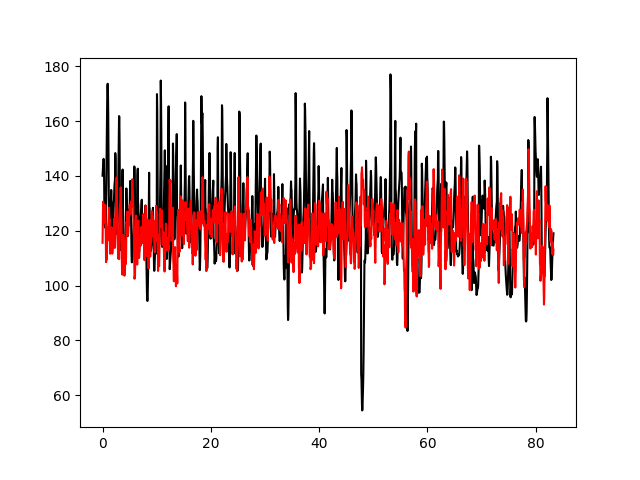

In [99]:
cp3_procx_transform = cc2.quick_cca(cp3_procx, cp3_ridge_transformer, scale=False)
cp3_procx_transform_format, _ = format_data(cp3_procx_transform, cp3_procy)

cp3_ridge_predics = test_wiener_filter(cp3_procx_transform_format, cp3_ridge_h)
fig8, ax8 = plt.subplots()
ts = bins_to_seconds(cp3_procy_format.shape[0])
ax8.plot(ts, cp3_procy_format[:,6], color='black')
ax8.plot(ts, cp3_ridge_predics[:,6], color='red')
#ax8.plot(ts, cp3_linear_predics[:,6], color='green')

In [101]:
cp3_clf, cp3_pinv_vaf, cp3_pinv_predic, cp3_actual_predic = cc2.new_apply_pinv_transform(decoder=cp2_h)

test_set_score=-0.48
test_set_score=-0.19
test_set_score=-0.65
test_set_score=-0.49
test_set_score=-0.18
test_set_score=-0.43
test_set_score=-0.4
test_set_score=-0.56
test_set_score=-0.39
test_set_score=-0.6


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
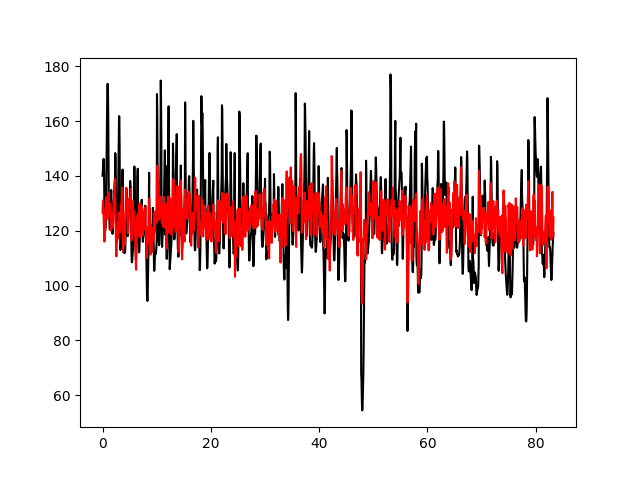

In [102]:
cp3_pinv_predics = pinv_predicter(cp3_clf, cp2_h, cp3_procx_format)
fig9, ax9 = plt.subplots()
ts = bins_to_seconds(cp3_procy_format.shape[0])
ax9.plot(ts, cp3_procy_format[:,6], color='black')
ax9.plot(ts, cp3_pinv_predics[:,6], color='red')